Author : Mohamed Elafifi

Student ID : 22066939

In [55]:
import csv
import pandas as pd
full_data = pd.read_csv('cities.csv')
full_data

,City,X,Y
0,City_1,37.454012,95.071431
1,City_2,73.199394,59.865848
2,City_3,15.601864,15.599452
3,City_4,5.808361,86.617615
4,City_5,60.111501,70.807258
5,City_6,2.058449,96.990985
6,City_7,83.244264,21.233911
7,City_8,18.182497,18.340451
8,City_9,30.424224,52.475643
9,City_10,43.194502,29.122914


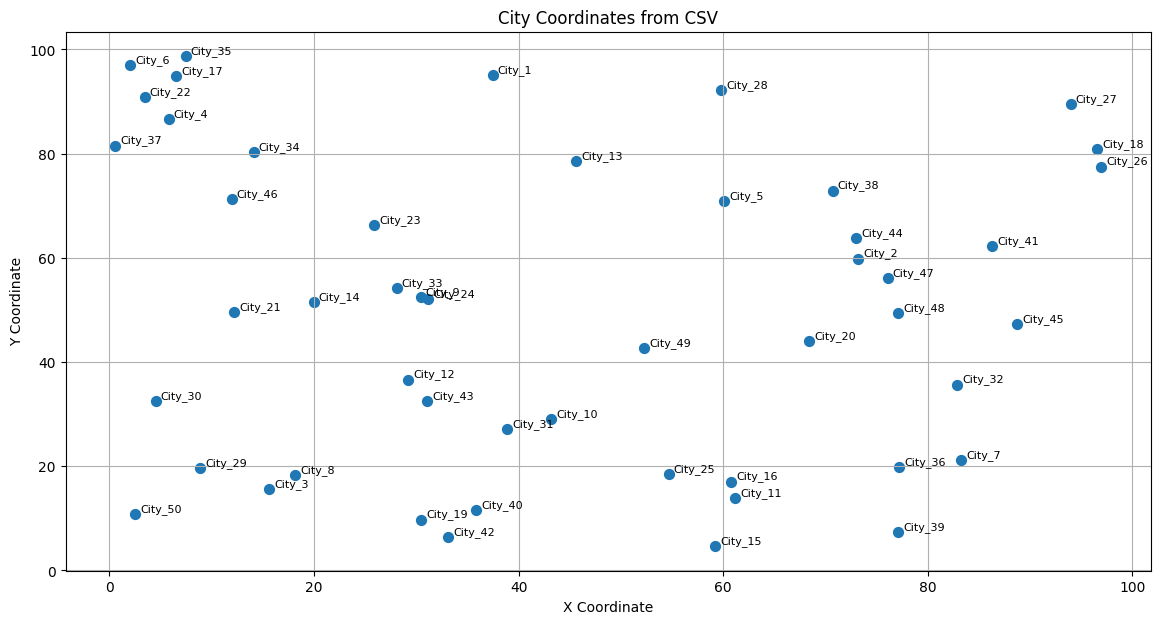

In [56]:
import matplotlib.pyplot as plt

plt.figure(figsize = (14,7))

plt.scatter(full_data["X"], full_data["Y"], s=50)

for i, row in full_data.iterrows():
    plt.text(row["X"] + 0.5, row["Y"] + 0.5, row["City"], fontsize = 8)

plt.xlabel("X Coordinate")
plt.ylabel("Y Coordinate")
plt.title("City Coordinates from CSV")
plt.grid(True)
plt.show()

In [63]:
import random
import math
import numpy as np

# Distance function
def calculate_distance(route):
    route_extended = np.append(route, [route[0]], axis=0)  # Return to the starting point
    return np.sum(np.sqrt(np.sum(np.diff(route_extended, axis=0)**2, axis=1)))

# Function to create a random initial route (permutation of indices)
def create_initial_route(cities):
    route = list(range(len(cities)))
    random.shuffle(route)
    return route

def get_neighbors(route):
    neighbors = []
    for i in range(len(route)):
        for j in range(i + 1, len(route)):
            neighbor = route.copy()
            neighbor[i], neighbor[j] = neighbor[j], neighbor[i]
            neighbors.append(neighbor)
    return neighbors

def simulated_annealing(cities, initial_temp, cooling_rate, max_iterations):
    current_route = create_initial_route(cities)
    current_distance = calculate_distance(cities[current_route])
    best_route = current_route.copy()
    best_distance = current_distance
    temperature = initial_temp

    for _ in range(max_iterations):
        neighbors = get_neighbors(current_route)
        next_route = random.choice(neighbors)
        next_distance = calculate_distance(cities[next_route])

        # Acceptance criterion
        if next_distance < current_distance or random.random() < np.exp((current_distance - next_distance) / temperature):
            current_route, current_distance = next_route, next_distance

            if current_distance < best_distance:
                best_route, best_distance = current_route, current_distance

        temperature *= cooling_rate

    return best_route, best_distance


# --- Run the algorithm ---
initial_temp = 1000
cooling_rate = 0.99
max_iterations = 1000
random.seed(40)

cities = full_data[["X", "Y"]].values

sa_route, sa_distance = simulated_annealing(cities, initial_temp, cooling_rate, max_iterations)

# ✅ NOW print based on the final best route
start_city = full_data.iloc[sa_route[0]]['City']
print(f"Starting City (final best route): {start_city}")

print("\nSimulated Annealing:")
print("Distance:", sa_distance)
print("Route:", [full_data.iloc[i]['City'] for i in sa_route] + [full_data.iloc[sa_route[0]]['City']])


Starting City (final best route): City_47

Simulated Annealing:
Distance: 1259.9580766699576
Route: ['City_47', 'City_32', 'City_45', 'City_27', 'City_41', 'City_20', 'City_10', 'City_9', 'City_42', 'City_3', 'City_8', 'City_11', 'City_15', 'City_40', 'City_19', 'City_25', 'City_48', 'City_7', 'City_36', 'City_39', 'City_16', 'City_49', 'City_24', 'City_31', 'City_43', 'City_12', 'City_29', 'City_50', 'City_30', 'City_21', 'City_46', 'City_5', 'City_38', 'City_17', 'City_34', 'City_33', 'City_2', 'City_44', 'City_18', 'City_26', 'City_1', 'City_35', 'City_22', 'City_37', 'City_23', 'City_14', 'City_13', 'City_6', 'City_4', 'City_28', 'City_47']


In [66]:
import random
import math
import numpy as np

def calculate_distance(route):
    route_extended = np.append(route, [route[0]], axis=0)
    return np.sum(np.sqrt(np.sum(np.diff(route_extended, axis=0)**2, axis=1)))


def create_initial_route(cities):
    route = list(range(len(cities)))
    random.shuffle(route)
    return route

def get_neighbors(route):
    neighbors = []
    for i in range(len(route)):
        for j in range(i + 1, len(route)):
            neighbor = route.copy()
            neighbor[i], neighbor[j] = neighbor[j], neighbor[i]
            neighbors.append(neighbor)
    return neighbors

def create_nearest_neighbor_route(cities, start_index=0):
    n = len(cities)
    unvisited = set(range(n))
    route = [start_index]
    unvisited.remove(start_index)

    while unvisited:
        last = route[-1]
        next_city = min(
            unvisited,
            key=lambda j: np.linalg.norm(cities[last] - cities[j])
        )
        route.append(next_city)
        unvisited.remove(next_city)

    return route


def simulated_annealing(cities, initial_temp, cooling_rate, max_iterations, start_index=0):
    current_route = create_nearest_neighbor_route(cities, start_index=start_index)
    current_distance = calculate_distance(cities[current_route])
    best_route = current_route.copy()
    best_distance = current_distance
    temperature = initial_temp

    for _ in range(max_iterations):
        neighbors = get_neighbors(current_route)
        next_route = random.choice(neighbors)
        next_distance = calculate_distance(cities[next_route])

        if next_distance < current_distance or random.random() < np.exp((current_distance - next_distance) / temperature):
            current_route, current_distance = next_route, next_distance

            if current_distance < best_distance:
                best_route, best_distance = current_route, current_distance

        temperature *= cooling_rate

    return best_route, best_distance



initial_temp = 1000
cooling_rate = 0.99
max_iterations = 1000
random.seed(44)

cities = full_data[["X", "Y"]].values
start_index = 0

sa_route, sa_distance = simulated_annealing(
    cities, initial_temp, cooling_rate, max_iterations, start_index=start_index
)

start_city = full_data.iloc[sa_route[0]]['City']
print(f"Starting City (final best route): {start_city}")

print("\nSimulated Annealing:")
print("Distance:", sa_distance)
print("Route:", [full_data.iloc[i]['City'] for i in sa_route] + [full_data.iloc[sa_route[0]]['City']])



Starting City (final best route): City_1

Simulated Annealing:
Distance: 694.7554613612607
Route: ['City_1', 'City_13', 'City_5', 'City_38', 'City_44', 'City_2', 'City_47', 'City_48', 'City_20', 'City_49', 'City_10', 'City_31', 'City_43', 'City_12', 'City_24', 'City_9', 'City_33', 'City_14', 'City_21', 'City_30', 'City_29', 'City_3', 'City_8', 'City_19', 'City_42', 'City_40', 'City_25', 'City_16', 'City_11', 'City_15', 'City_39', 'City_36', 'City_7', 'City_32', 'City_45', 'City_41', 'City_26', 'City_18', 'City_27', 'City_28', 'City_23', 'City_46', 'City_34', 'City_4', 'City_22', 'City_17', 'City_35', 'City_6', 'City_37', 'City_50', 'City_1']


In [68]:
import random
import math
import numpy as np

def calculate_distance(route):
    route_extended = np.append(route, [route[0]], axis=0)
    return np.sum(np.sqrt(np.sum(np.diff(route_extended, axis=0)**2, axis=1)))

def create_initial_route(cities):
    route = list(range(len(cities)))
    random.shuffle(route)
    return route

def get_neighbors(route):
    neighbors = []
    for i in range(len(route)):
        for j in range(i + 1, len(route)):
            neighbor = route.copy()
            neighbor[i], neighbor[j] = neighbor[j], neighbor[i]
            neighbors.append(neighbor)
    return neighbors

def best_nearest_neighbor_route(cities):

    n = len(cities)
    best_distance = math.inf
    best_route = None
    best_start = None

    for start_index in range(n):
        route = create_nearest_neighbor_route(cities, start_index=start_index)
        distance = calculate_distance(cities[route])

        if distance < best_distance:
            best_distance = distance
            best_route = route
            best_start = start_index

    return best_start, best_route, best_distance


def simulated_annealing(cities, initial_temp, cooling_rate, max_iterations, start_index=None):
    if start_index is None:
        start_index, current_route, current_distance = best_nearest_neighbor_route(cities)
    else:
        current_route = create_nearest_neighbor_route(cities, start_index=start_index)
        current_distance = calculate_distance(cities[current_route])

    best_route = current_route.copy()
    best_distance = current_distance
    temperature = initial_temp

    for _ in range(max_iterations):
        neighbors = get_neighbors(current_route)
        next_route = random.choice(neighbors)
        next_distance = calculate_distance(cities[next_route])

        if next_distance < current_distance or random.random() < np.exp((current_distance - next_distance) / temperature):
            current_route, current_distance = next_route, next_distance

            if current_distance < best_distance:
                best_route, best_distance = current_route, current_distance

        temperature *= cooling_rate

    return best_route, best_distance, start_index



initial_temp = 1000
cooling_rate = 0.99
max_iterations = 1000
random.seed(44)

cities = full_data[["X", "Y"]].values

sa_route, sa_distance, chosen_start_index = simulated_annealing(
    cities, initial_temp, cooling_rate, max_iterations, start_index=None)

start_city = full_data.iloc[sa_route[0]]['City']
print(f"Starting City (auto-chosen best greedy start): {start_city}")

print("\nSimulated Annealing:")
print("Distance:", sa_distance)
print("Route:", [full_data.iloc[i]['City'] for i in sa_route] + [full_data.iloc[sa_route[0]]['City']])



Starting City (auto-chosen best greedy start): City_20

Simulated Annealing:
Distance: 597.0642468988182
Route: ['City_20', 'City_48', 'City_47', 'City_2', 'City_44', 'City_38', 'City_5', 'City_13', 'City_1', 'City_28', 'City_27', 'City_18', 'City_26', 'City_41', 'City_45', 'City_32', 'City_7', 'City_36', 'City_39', 'City_11', 'City_16', 'City_25', 'City_15', 'City_40', 'City_19', 'City_42', 'City_8', 'City_3', 'City_29', 'City_50', 'City_30', 'City_21', 'City_14', 'City_33', 'City_9', 'City_24', 'City_23', 'City_46', 'City_34', 'City_4', 'City_22', 'City_17', 'City_35', 'City_6', 'City_37', 'City_12', 'City_43', 'City_31', 'City_10', 'City_49', 'City_20']
